In [ ]:
import pandas as pd

train_data = pd.read_csv('/content/train.csv')

test_data = pd.read_csv('/content/test.csv')



In [ ]:
import pandas as pd

test_data = pd.read_csv('/content/test.csv')



In [ ]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
HasCabin,0


In [ ]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())


In [ ]:
test_data['Age'] = test_data['Age'].fillna(train_data['Age'].median())

In [ ]:
train_data['HasCabin'] = train_data['Cabin'].notna().astype(int)

In [ ]:
test_data['HasCabin'] = test_data['Cabin'].notna().astype(int)

In [ ]:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])


In [ ]:
train_data.drop(columns=['Cabin'], inplace=True)



In [ ]:
test_data.drop(columns=['Cabin'], inplace=True)

In [ ]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,HasCabin,Embarked_C,Embarked_Q,Embarked_S
798,799,0,3,"Ibrahim Shawah, Mr. Yousseff",0,30.00,0,0,2685,7.2292,0,1,0,0
582,583,0,2,"Downton, Mr. William James",0,54.00,0,0,28403,26.0000,0,0,0,1
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",1,28.00,1,0,P/PP 3381,24.0000,0,1,0,0
831,832,1,2,"Richards, Master. George Sibley",0,0.83,1,1,29106,18.7500,0,0,0,1
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",1,8.00,0,2,C.A. 31921,26.2500,0,0,0,1


In [ ]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})


In [ ]:
train_data = pd.get_dummies(train_data, columns=["Embarked"])


KeyError: "None of [Index(['Embarked'], dtype='object')] are in the [columns]"

In [ ]:
test_data = pd.get_dummies(test_data, columns=["Embarked"])

In [ ]:
train_data[["Embarked_C", "Embarked_Q", "Embarked_S"]] = train_data[["Embarked_C", "Embarked_Q", "Embarked_S"]].astype(int)



KeyError: "None of [Index(['Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype='object')] are in the [columns]"

In [ ]:
test_data.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,HasCabin,Embarked_C,Embarked_Q,Embarked_S
61,953,2,"McCrae, Mr. Arthur Gordon",0,32.0,0,0,237216,13.5000,0,0,0,1
45,937,3,"Peltomaki, Mr. Nikolai Johannes",0,25.0,0,0,STON/O 2. 3101291,7.9250,0,0,0,1
67,959,1,"Moore, Mr. Clarence Bloomfield",0,47.0,0,0,113796,42.4000,0,0,0,1
154,1046,3,"Asplund, Master. Filip Oscar",0,13.0,4,2,347077,31.3875,0,0,0,1
342,1234,3,"Sage, Mr. John George",0,28.0,1,9,CA. 2343,69.5500,0,0,0,1


In [ ]:
test_data = pd.get_dummies(test_data, columns=["Embarked"])

In [ ]:
test_data[["Embarked_C", "Embarked_Q", "Embarked_S"]] = test_data[["Embarked_C", "Embarked_Q", "Embarked_S"]].astype(int)

In [ ]:
test_data['Sex'] = test_data['Sex'].map({'male':0, 'female': 1})

In [ ]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [ ]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,HasCabin,Embarked_C,Embarked_Q,Embarked_S
283,284,1,3,"Dorking, Mr. Edward Arthur",0,19.0,0,0,A/5. 10482,8.0500,0,0,0,1
531,532,0,3,"Toufik, Mr. Nakli",0,28.0,0,0,2641,7.2292,0,1,0,0
806,807,0,1,"Andrews, Mr. Thomas Jr",0,39.0,0,0,112050,0.0000,1,0,0,1
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",1,28.0,1,0,PC 17604,82.1708,0,1,0,0
288,289,1,2,"Hosono, Mr. Masabumi",0,42.0,0,0,237798,13.0000,0,0,0,1


In [ ]:
from re import X
from sklearn.model_selection import train_test_split

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S"]
x = train_data[features]
y = train_data["Survived"]

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators= 100, max_depth= 5, random_state= 1)

model.fit(x_train,y_train)

val_predictions = model.predict(x_val)

accuracy = accuracy_score(y_val,val_predictions)

print(f'Validation Accuracy : {accuracy:.4f}')

Validation Accuracy : 0.8101


In [81]:
import joblib
joblib.dump(model,'Titanic_model_RandomForest.pkl')

['Titanic_model_RandomForest.pkl']

In [ ]:
train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")


Training Accuracy: 0.8567


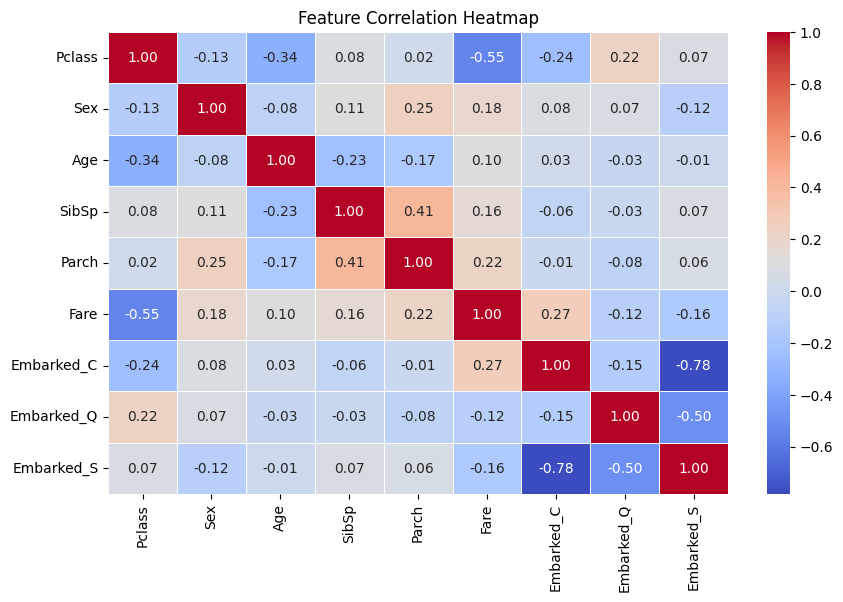

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = train_data[features].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(x_train, y_train)

# Predict on validation set
y_val_pred = log_reg.predict(x_val)

# Calculate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print accuracy
print(f"Validation Accuracy (Logistic Regression): {val_accuracy:.4f}")


Validation Accuracy (Logistic Regression): 0.8101


In [83]:
import joblib
joblib.dump(model,'Titanic_model_Logistic Regression.pkl')

['Titanic_model_Logistic Regression.pkl']

In [84]:
model = joblib.load('/content/Titanic_model_RandomForest.pkl')

model.fit(x_train,y_train)

val_predictions = model.predict(x_val)

accuracy = accuracy_score(y_val,val_predictions)

print(f'Validation Accuracy : {accuracy:.4f}')

Validation Accuracy : 0.8101


In [85]:
log_reg = joblib.load('/content/Titanic_model_Logistic Regression.pkl')
log_reg.fit(x_train, y_train)

# Predict on validation set
y_val_pred = log_reg.predict(x_val)

# Calculate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print accuracy
print(f"Validation Accuracy (Logistic Regression): {val_accuracy:.4f}")


Validation Accuracy (Logistic Regression): 0.8101
